## Setup

### Recommended:

1. Fork or clone the [GitHub repository](https://github.com/cescalara/jAG25-workshop.git) containing the course material, so that you have it locally

```git clone https://github.com/cescalara/jAG25-workshop.git```

2. Install the necessary python packages (using a virtual environment if possible)

```pip install numpy scipy matplotlib ipykernel cmdstanpy arviz```

3. Install the `cmdstan` package that we will use to run fits

```install_cmdstan```

4. Open the notebook using Jupyter, select the correct python kernel and get going.

We can check the necessary packages are installed

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import arviz as av
from cmdstanpy import CmdStanModel

### Basic probability distributions

Useful references:

* scipy: https://docs.scipy.org/doc/scipy/reference/ 

Plot the probability density function for a narrow uniform distribution between 1.1 and 1.6, with zero probability elsewhere

Text(0, 0.5, 'p(x)')

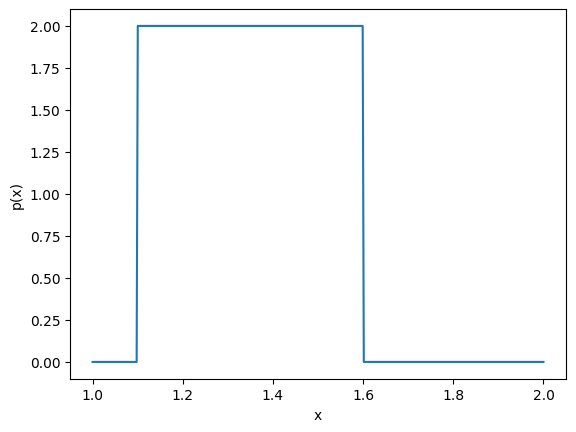

In [2]:
x = np.linspace(1.0, 2.0, 400)
uniform_dist = stats.uniform(1.1, 0.5)

fig, ax = plt.subplots()
ax.plot(x, uniform_dist.pdf(x))
ax.set_xlabel("x")
ax.set_ylabel("p(x)")

What is the probability density at x=1.2?

In [3]:
uniform_dist.pdf(1.2)

np.float64(2.0)

What is the integral of the probability density?

$\int_{-\infty}^{\infty} p(x)dx=?$


In [4]:
uniform_dist.pdf(1.2) * (1.6 - 1.1)

np.float64(1.0)

Create a normal distribution object (`scipy.stats.norm`) centered at 1.5 with standard deviation 0.02. Plot its probability density distribution (PDF), and cumulative distribution function (CDF).


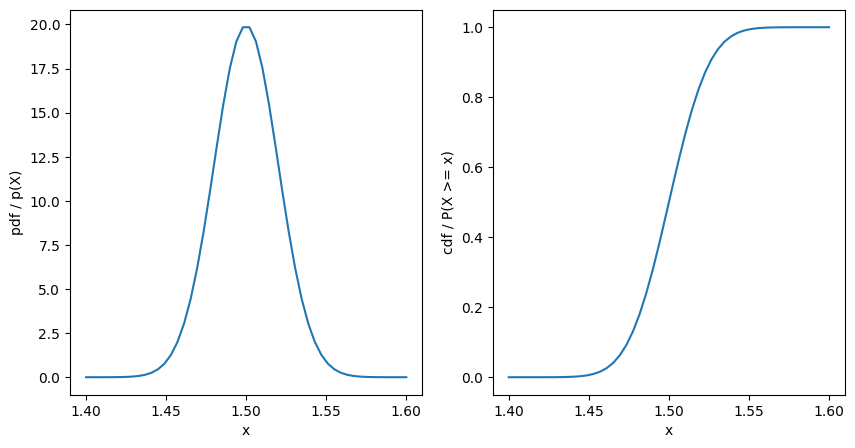

In [5]:
norm_dist = stats.norm(1.5, 0.02)
x = np.linspace(1.5 - (5*0.02), 1.5 + (5*0.02))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

ax[0].plot(x, norm_dist.pdf(x))
ax[0].set_ylabel("pdf / p(X)")

ax[1].plot(x, norm_dist.cdf(x))
ax[1].set_ylabel("cdf / P(X >= x)")

for _ in ax:
    _.set_xlabel("x")

How much probability is below 1.48?

In [6]:
norm_dist.cdf(1.48)

np.float64(0.15865525393145685)

How much probability is above 1.52?

In [7]:
1 - norm_dist.cdf(1.52)

np.float64(0.15865525393145685)

Combine the above to find out how much probability is between 1.44 and 1.56. Dos this match what you expect from "3 sigma"?

In [9]:
p_in_range = norm_dist.cdf(1.56) - norm_dist.cdf(1.44)
p_in_range 

np.float64(0.9973002039367398)

## Generating random numbers

Useful references:

* numpy.random: https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html 
* numpy User guide: https://numpy.org/doc/stable/user/
* matplotlib for plotting: https://matplotlib.org/

Create a grid from 1 to 1.5 with 101 points:

In [10]:
xgrid = np.linspace(1, 1.5, 101)
xgrid

array([1.   , 1.005, 1.01 , 1.015, 1.02 , 1.025, 1.03 , 1.035, 1.04 ,
       1.045, 1.05 , 1.055, 1.06 , 1.065, 1.07 , 1.075, 1.08 , 1.085,
       1.09 , 1.095, 1.1  , 1.105, 1.11 , 1.115, 1.12 , 1.125, 1.13 ,
       1.135, 1.14 , 1.145, 1.15 , 1.155, 1.16 , 1.165, 1.17 , 1.175,
       1.18 , 1.185, 1.19 , 1.195, 1.2  , 1.205, 1.21 , 1.215, 1.22 ,
       1.225, 1.23 , 1.235, 1.24 , 1.245, 1.25 , 1.255, 1.26 , 1.265,
       1.27 , 1.275, 1.28 , 1.285, 1.29 , 1.295, 1.3  , 1.305, 1.31 ,
       1.315, 1.32 , 1.325, 1.33 , 1.335, 1.34 , 1.345, 1.35 , 1.355,
       1.36 , 1.365, 1.37 , 1.375, 1.38 , 1.385, 1.39 , 1.395, 1.4  ,
       1.405, 1.41 , 1.415, 1.42 , 1.425, 1.43 , 1.435, 1.44 , 1.445,
       1.45 , 1.455, 1.46 , 1.465, 1.47 , 1.475, 1.48 , 1.485, 1.49 ,
       1.495, 1.5  ])

Set the seed to 42

In [11]:
np.random.seed(42)

For each value, generate a random number, Gaussian distributed centered at that value.
Use standard deviation of 0.1 for the noise introduced.

In [12]:
measured = stats.norm(loc=xgrid, scale=0.1).rvs()
measured

array([1.04967142, 0.99117357, 1.07476885, 1.16730299, 0.99658466,
       1.0015863 , 1.18792128, 1.11174347, 0.99305256, 1.099256  ,
       1.00365823, 1.00842702, 1.08419623, 0.87367198, 0.89750822,
       1.01877125, 0.97871689, 1.11642473, 0.99919759, 0.95376963,
       1.24656488, 1.08242237, 1.11675282, 0.97252518, 1.06556173,
       1.13609226, 1.01490064, 1.1725698 , 1.07993613, 1.11583063,
       1.08982934, 1.34022782, 1.15865028, 1.05922891, 1.25225449,
       1.05291564, 1.20088636, 0.98903299, 1.0571814 , 1.21468612,
       1.27384666, 1.22213683, 1.19843517, 1.18488963, 1.0721478 ,
       1.15301558, 1.18393612, 1.34071222, 1.27436183, 1.06869598,
       1.2824084 , 1.21649177, 1.1923078 , 1.32616763, 1.37309995,
       1.36812801, 1.19607825, 1.25407876, 1.32312634, 1.39255451,
       1.25208258, 1.2864341 , 1.1993665 , 1.19537934, 1.40125258,
       1.460624  , 1.32279899, 1.43535329, 1.3761636 , 1.28048802,
       1.38613956, 1.50880366, 1.3564174 , 1.52146437, 1.10802

Plot one against the other as a scatter plot. Assign each point a error bar of 0.1.


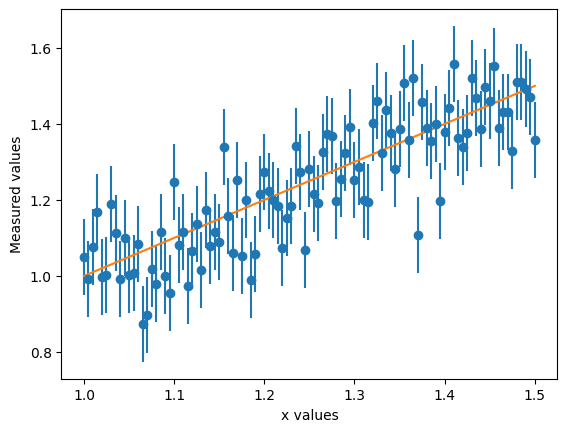

In [13]:
plt.errorbar(x=xgrid, y=measured, yerr=0.1, marker='o', ls=' ')
plt.plot(xgrid, xgrid)
plt.xlabel('x values')
plt.ylabel('Measured values');

Plot a histogram of the measured values.


(array([ 2., 11., 10., 11., 15., 10.,  8., 16.,  9.,  9.]),
 array([0.87367198, 0.94208372, 1.01049546, 1.0789072 , 1.14731895,
        1.21573069, 1.28414243, 1.35255418, 1.42096592, 1.48937766,
        1.5577894 ]),
 <BarContainer object of 10 artists>)

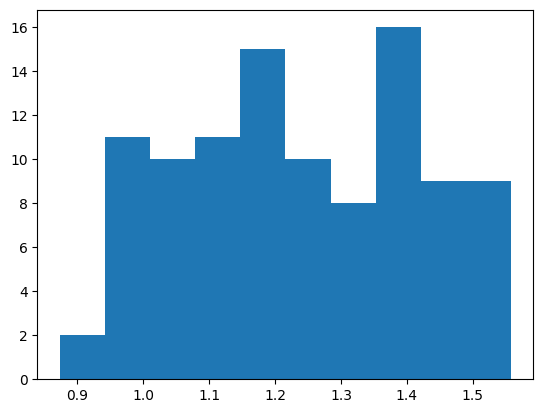

In [14]:
fig, ax = plt.subplots()
ax.hist(measured)

Compute summary statistics of this distribution: mean, median, standard deviation, 1% and 99% quantile.

In [15]:
np.mean(measured)

np.float64(1.2383168094242971)

In [16]:
np.std(measured)

np.float64(0.1732142257518032)

In [17]:
np.median(measured)

np.float64(1.222136828118997)

In [18]:
np.quantile(measured, 0.01)

np.float64(0.8975082167486967)

In [19]:
np.quantile(measured, 0.99)

np.float64(1.551864499053289)